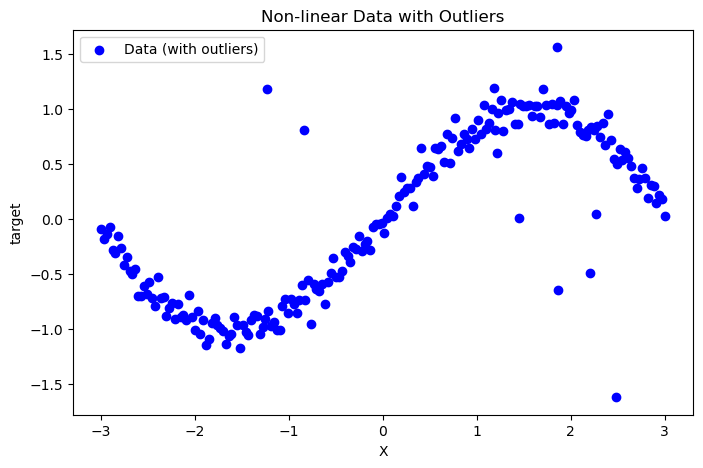

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,X,target
0,-0.485364,0.081874,2.314659,-1.867265,0.686260,-1.612716,-0.471932,1.088951,0.064280,-1.077745,-3.000000,-0.091449
1,-0.715304,0.679598,-0.730367,0.216459,0.045572,-0.651600,2.143944,0.633919,-2.025143,0.186454,-2.969849,-0.184727
2,-0.661786,0.852433,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,-2.939698,-0.135757
3,1.765454,0.404982,-1.260884,0.917862,2.122156,1.032465,-1.519370,-0.484234,1.266911,-0.707669,-2.909548,-0.077665
4,0.443819,0.774634,-0.926930,-0.059525,-3.241267,-1.024388,-0.252568,-1.247783,1.632411,-1.430141,-2.879397,-0.282617


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Seed for reproducibility
np.random.seed(42)

# 1. Create non-linear data
X_nonlinear = np.linspace(-3, 3, 200)
y_nonlinear = np.sin(X_nonlinear) + np.random.normal(0, 0.1, X_nonlinear.shape)

# 2. Add outliers
X_outliers = np.random.uniform(-3, 3, 10)
y_outliers = np.random.uniform(-2, 2, 10)
X_total = np.concatenate([X_nonlinear, X_outliers])
y_total = np.concatenate([y_nonlinear, y_outliers])

# 3. Add high dimensionality (create 10 random features)
high_dim_features = np.random.randn(len(X_total), 10)
df = pd.DataFrame(high_dim_features, columns=[f"feature_{i}" for i in range(10)])
df["X"] = X_total
df["target"] = y_total

# Plot the main feature vs target to show non-linearity & outliers
plt.figure(figsize=(8,5))
plt.scatter(X_total, y_total, color='blue', label='Data (with outliers)')
plt.title('Non-linear Data with Outliers')
plt.xlabel('X')
plt.ylabel('target')
plt.legend()
plt.show()

# Show sample of high dimensional dataset
df.head()

In [2]:
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv("C:\\Users\\amitm\\Downloads\\Flight_price_clean.csv")

In [13]:
df = data.copy()

In [14]:
df

,flight_id,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd
0,1,Los Angeles,Denver,United,19,4509,30,0,5.1,High,311.29
1,2,New York,Miami,United,8,1285,3,0,2.0,Low,214.26
2,3,Miami,Houston,Southwest,19,4664,35,0,5.5,Low,203.16
3,4,Houston,Denver,Southwest,18,4444,71,0,4.7,High,297.55
4,5,Houston,Boston,United,19,4286,76,1,5.1,Medium,253.25
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Denver,Seattle,Delta,17,1268,24,1,2.0,High,258.22
1996,1997,New York,Seattle,American,13,2983,25,0,3.4,High,340.37
1997,1998,New York,Houston,American,9,1118,76,0,2.0,Medium,150.00
1998,1999,Los Angeles,Miami,Delta,13,2669,81,0,3.5,Medium,161.26


In [15]:
df.shape

(2000, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              2000 non-null   int64  
 1   departure_city         2000 non-null   object 
 2   destination_city       2000 non-null   object 
 3   airline                2000 non-null   object 
 4   departure_hour         2000 non-null   int64  
 5   distance_km            2000 non-null   int64  
 6   booking_days           2000 non-null   int64  
 7   is_weekend             2000 non-null   int64  
 8   flight_duration_hours  2000 non-null   float64
 9   demand_level           2000 non-null   object 
 10  price_usd              2000 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 172.0+ KB


In [17]:
df.isnull().sum()

flight_id                0
departure_city           0
destination_city         0
airline                  0
departure_hour           0
distance_km              0
booking_days             0
is_weekend               0
flight_duration_hours    0
demand_level             0
price_usd                0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
le_departure = LabelEncoder()

In [21]:
le_destination = LabelEncoder()

In [22]:
le_airline = LabelEncoder()

In [23]:
le_demand = LabelEncoder()

In [24]:
df["departure_city"] = le_departure.fit_transform(df["departure_city"])

In [25]:
df

,flight_id,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd
0,1,5,Denver,United,19,4509,30,0,5.1,High,311.29
1,2,7,Miami,United,8,1285,3,0,2.0,Low,214.26
2,3,6,Houston,Southwest,19,4664,35,0,5.5,Low,203.16
3,4,4,Denver,Southwest,18,4444,71,0,4.7,High,297.55
4,5,4,Boston,United,19,4286,76,1,5.1,Medium,253.25
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,3,Seattle,Delta,17,1268,24,1,2.0,High,258.22
1996,1997,7,Seattle,American,13,2983,25,0,3.4,High,340.37
1997,1998,7,Houston,American,9,1118,76,0,2.0,Medium,150.00
1998,1999,5,Miami,Delta,13,2669,81,0,3.5,Medium,161.26


In [26]:
df["col12"] = "amit"

In [28]:
df.drop("col12", axis = 1, inplace=True )

In [29]:
df

,flight_id,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd
0,1,5,Denver,United,19,4509,30,0,5.1,High,311.29
1,2,7,Miami,United,8,1285,3,0,2.0,Low,214.26
2,3,6,Houston,Southwest,19,4664,35,0,5.5,Low,203.16
3,4,4,Denver,Southwest,18,4444,71,0,4.7,High,297.55
4,5,4,Boston,United,19,4286,76,1,5.1,Medium,253.25
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,3,Seattle,Delta,17,1268,24,1,2.0,High,258.22
1996,1997,7,Seattle,American,13,2983,25,0,3.4,High,340.37
1997,1998,7,Houston,American,9,1118,76,0,2.0,Medium,150.00
1998,1999,5,Miami,Delta,13,2669,81,0,3.5,Medium,161.26


In [30]:
df["destination_city"] = le_destination.fit_transform(df["destination_city"])

In [31]:
df

,flight_id,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd
0,1,5,3,United,19,4509,30,0,5.1,High,311.29
1,2,7,6,United,8,1285,3,0,2.0,Low,214.26
2,3,6,4,Southwest,19,4664,35,0,5.5,Low,203.16
3,4,4,3,Southwest,18,4444,71,0,4.7,High,297.55
4,5,4,1,United,19,4286,76,1,5.1,Medium,253.25
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,3,9,Delta,17,1268,24,1,2.0,High,258.22
1996,1997,7,9,American,13,2983,25,0,3.4,High,340.37
1997,1998,7,4,American,9,1118,76,0,2.0,Medium,150.00
1998,1999,5,6,Delta,13,2669,81,0,3.5,Medium,161.26


In [32]:
df["airline"] = le_airline.fit_transform(df["airline"])

In [33]:
df

,flight_id,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd
0,1,5,3,4,19,4509,30,0,5.1,High,311.29
1,2,7,6,4,8,1285,3,0,2.0,Low,214.26
2,3,6,4,3,19,4664,35,0,5.5,Low,203.16
3,4,4,3,3,18,4444,71,0,4.7,High,297.55
4,5,4,1,4,19,4286,76,1,5.1,Medium,253.25
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,3,9,1,17,1268,24,1,2.0,High,258.22
1996,1997,7,9,0,13,2983,25,0,3.4,High,340.37
1997,1998,7,4,0,9,1118,76,0,2.0,Medium,150.00
1998,1999,5,6,1,13,2669,81,0,3.5,Medium,161.26


In [34]:
df["demand_level"] = le_demand.fit_transform(df["demand_level"])

In [36]:
df.drop("flight_id", axis= 1, inplace=True)

In [37]:
df

,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd
0,5,3,4,19,4509,30,0,5.1,0,311.29
1,7,6,4,8,1285,3,0,2.0,1,214.26
2,6,4,3,19,4664,35,0,5.5,1,203.16
3,4,3,3,18,4444,71,0,4.7,0,297.55
4,4,1,4,19,4286,76,1,5.1,2,253.25
...,...,...,...,...,...,...,...,...,...,...
1995,3,9,1,17,1268,24,1,2.0,0,258.22
1996,7,9,0,13,2983,25,0,3.4,0,340.37
1997,7,4,0,9,1118,76,0,2.0,2,150.00
1998,5,6,1,13,2669,81,0,3.5,2,161.26


In [40]:
assert df.isnull().sum().sum() == 0, "Missing value detected"

In [42]:
df.shape

(2000, 10)

In [43]:
# Step 3: Feature Engineering
# Create new feature: time_of_day
df['time_of_day'] = pd.cut(df['departure_hour'], 
                          bins=[0, 6, 12, 18, 24], 
                          labels=[0, 1, 2, 3],  # Night, Morning, Afternoon, Evening
                          include_lowest=True)

In [44]:
df['time_of_day'] 

0       3
1       1
2       3
3       2
4       3
       ..
1995    2
1996    2
1997    1
1998    2
1999    0
Name: time_of_day, Length: 2000, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [45]:
df

,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd,time_of_day
0,5,3,4,19,4509,30,0,5.1,0,311.29,3
1,7,6,4,8,1285,3,0,2.0,1,214.26,1
2,6,4,3,19,4664,35,0,5.5,1,203.16,3
3,4,3,3,18,4444,71,0,4.7,0,297.55,2
4,4,1,4,19,4286,76,1,5.1,2,253.25,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,3,9,1,17,1268,24,1,2.0,0,258.22,2
1996,7,9,0,13,2983,25,0,3.4,0,340.37,2
1997,7,4,0,9,1118,76,0,2.0,2,150.00,1
1998,5,6,1,13,2669,81,0,3.5,2,161.26,2


In [46]:
#Create interaction feature: distance per hour
df['distance_per_hour'] = df['distance_km'] / df['flight_duration_hours']

In [47]:
df

,departure_city,destination_city,airline,departure_hour,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd,time_of_day,distance_per_hour
0,5,3,4,19,4509,30,0,5.1,0,311.29,3,884.117647
1,7,6,4,8,1285,3,0,2.0,1,214.26,1,642.500000
2,6,4,3,19,4664,35,0,5.5,1,203.16,3,848.000000
3,4,3,3,18,4444,71,0,4.7,0,297.55,2,945.531915
4,4,1,4,19,4286,76,1,5.1,2,253.25,3,840.392157
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3,9,1,17,1268,24,1,2.0,0,258.22,2,634.000000
1996,7,9,0,13,2983,25,0,3.4,0,340.37,2,877.352941
1997,7,4,0,9,1118,76,0,2.0,2,150.00,1,559.000000
1998,5,6,1,13,2669,81,0,3.5,2,161.26,2,762.571429


In [48]:
# Drop original departure_hour (replaced by time_of_day)
df = df.drop('departure_hour', axis=1)

In [49]:
df

,departure_city,destination_city,airline,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,price_usd,time_of_day,distance_per_hour
0,5,3,4,4509,30,0,5.1,0,311.29,3,884.117647
1,7,6,4,1285,3,0,2.0,1,214.26,1,642.500000
2,6,4,3,4664,35,0,5.5,1,203.16,3,848.000000
3,4,3,3,4444,71,0,4.7,0,297.55,2,945.531915
4,4,1,4,4286,76,1,5.1,2,253.25,3,840.392157
...,...,...,...,...,...,...,...,...,...,...,...
1995,3,9,1,1268,24,1,2.0,0,258.22,2,634.000000
1996,7,9,0,2983,25,0,3.4,0,340.37,2,877.352941
1997,7,4,0,1118,76,0,2.0,2,150.00,1,559.000000
1998,5,6,1,2669,81,0,3.5,2,161.26,2,762.571429


In [50]:
# Step 4: Split Features and Target
X = df.drop('price_usd', axis=1)
y = df['price_usd']

In [51]:
X

,departure_city,destination_city,airline,distance_km,booking_days,is_weekend,flight_duration_hours,demand_level,time_of_day,distance_per_hour
0,5,3,4,4509,30,0,5.1,0,3,884.117647
1,7,6,4,1285,3,0,2.0,1,1,642.500000
2,6,4,3,4664,35,0,5.5,1,3,848.000000
3,4,3,3,4444,71,0,4.7,0,2,945.531915
4,4,1,4,4286,76,1,5.1,2,3,840.392157
...,...,...,...,...,...,...,...,...,...,...
1995,3,9,1,1268,24,1,2.0,0,2,634.000000
1996,7,9,0,2983,25,0,3.4,0,2,877.352941
1997,7,4,0,1118,76,0,2.0,2,1,559.000000
1998,5,6,1,2669,81,0,3.5,2,2,762.571429


In [52]:
y

0       311.29
1       214.26
2       203.16
3       297.55
4       253.25
         ...  
1995    258.22
1996    340.37
1997    150.00
1998    161.26
1999    168.54
Name: price_usd, Length: 2000, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [56]:
x_train.shape

(1500, 10)

In [57]:
y_train.shape

(1500,)

In [58]:
x_test.shape

(500, 10)

In [59]:
y_test.shape

(500,)

In [61]:
from sklearn.ensemble  import RandomForestRegressor

In [62]:
rf = RandomForestRegressor(random_state=45)

In [64]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=45)

In [65]:
rf.score(x_test,y_test)

0.9793445268162208

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
y_pred = rf.predict(x_test)

In [69]:
MSE = mean_squared_error(y_test, y_pred)

In [71]:
RMSE = np.sqrt(MSE)

In [73]:
R2 = r2_score(y_test, y_pred)

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
# Hyperparameter Tuning with RandomSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto' as it's deprecated
}

In [76]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    n_jobs=-1,
    random_state=45,
    verbose=2  # Optional: to see progress
)

In [77]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=45),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=45, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
best_rf = random_search.best_estimator_

In [81]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [82]:
y_train_pred =best_rf.predict(x_train)

In [83]:
y_test_pred = best_rf.predict(x_test)

In [87]:
y_train_pred.shape

(1500,)

In [86]:
y_test_pred.shape

(500,)

In [89]:
mse = mean_squared_error(y_test, y_test_pred)

In [91]:
rmse= np.sqrt(mse)

In [94]:
r2 = r2_score(y_test,y_test_pred)

In [93]:
best_rf.score(x_test,y_test)

0.9592727061465867

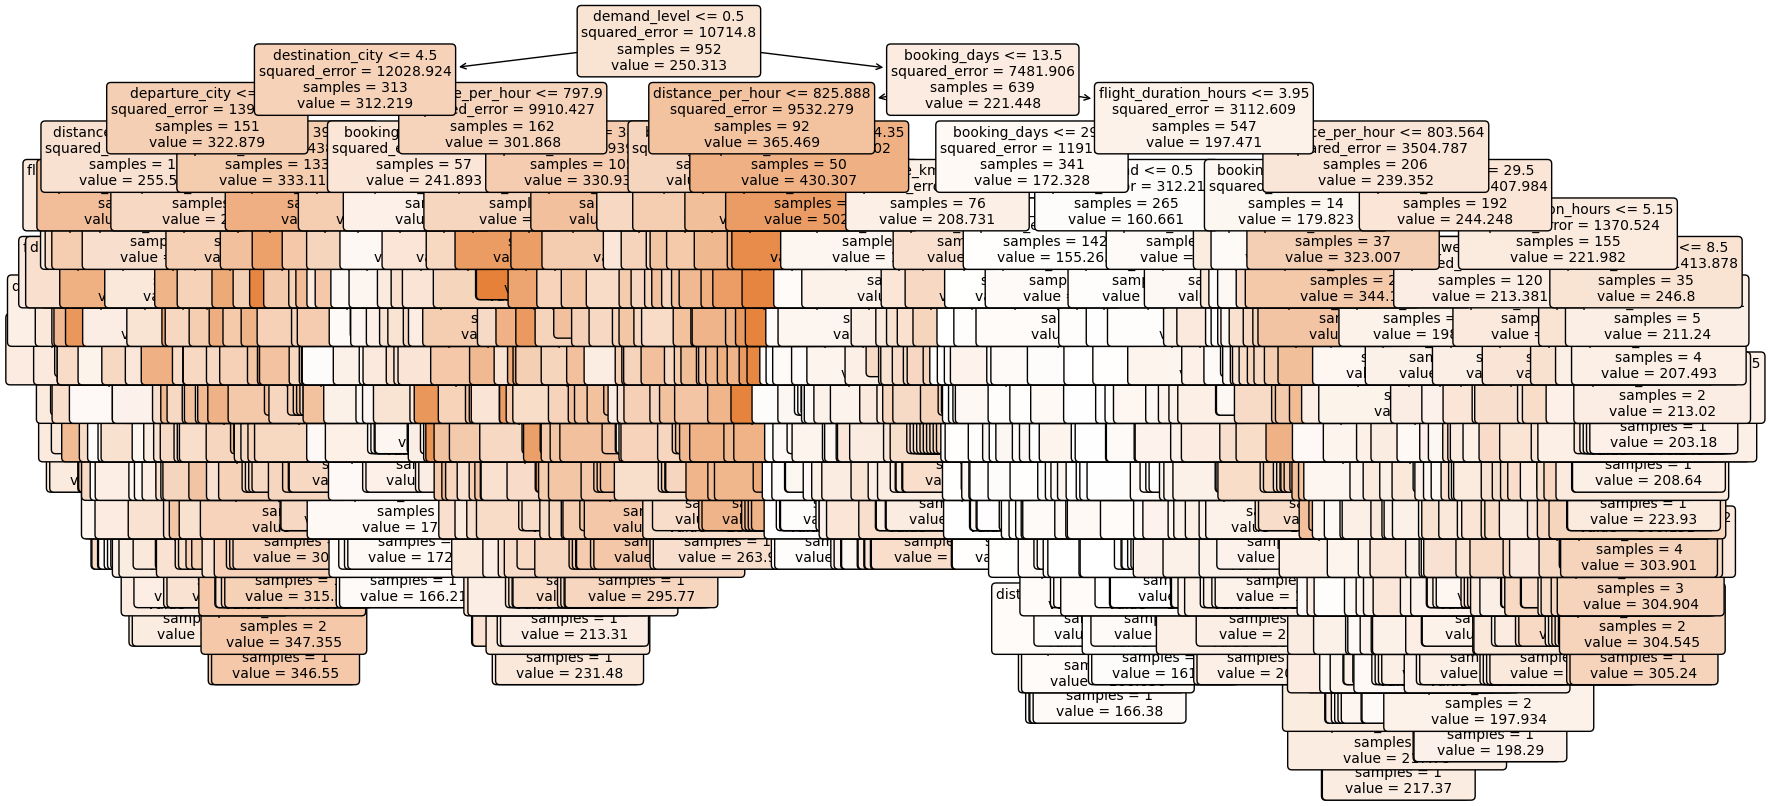

In [96]:
from sklearn import tree
import matplotlib.pyplot as plt

# Pick one tree from the forest
estimator = best_rf.estimators_[0]  # 0th tree in the forest

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(estimator,
               feature_names=x_train.columns,
               filled=True,
               rounded=True,
               fontsize=10)
plt.show()